# Absorber Examples

**Scott Prahl**

**Oct 2023**

We use Green's function solutions for heat transfer due to an xy-planar
source in an infinite medium, encapsulated within the `Plane` class. The solutions are
based on the mathematical formulations provided in Carslaw and Jaeger's work.

The `Plane` class represents a planar heat source located at a specified depth `zp` in
the medium. It provides methods to calculate the temperature rise at any given depth `z`
at a specified time `t` due to different types of heat source behavior.

Three types of planar sources are supported:

- **Instantaneous**: Represents a single, instantaneous release of heat from zp-plane at time `tp`.

- **Continuous**: Represents a continuous release of heat from the zp-plane starting at t=0

- **Pulsed**: Represents a pulsed release of heat from the zp-plane for t=0 to `t_pulse`.

The module supports various boundary conditions such as infinite, adiabatic, or zero
boundary, and allows for specifying thermal properties like diffusivity and volumetric
heat capacity of the medium.

In [1]:
import grheat
import numpy as np
import matplotlib.pyplot as plt

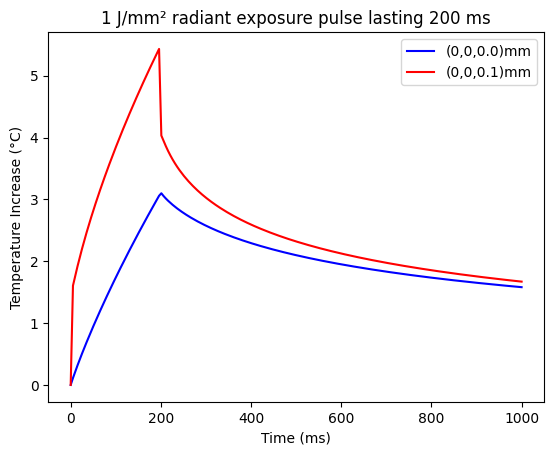

In [14]:
mua = 4 * 1000               # 1/m  (1mm⁻¹ = 1000m⁻¹)
medium = grheat.Absorber(mua)
t = np.linspace(0, 1, 200)   # seconds
t_pulse = 0.200              # seconds

z = 0                        # meters
T = medium.pulsed(z, t, t_pulse)      # 1 J/m^2
T *= 1e4                              # 10 mJ/mm^2

plt.plot(t * 1000, T, color='blue', label="(0,0,%.1f)mm"%(1000*z))

z = 0.0001
T = medium.pulsed(z, t, t_pulse)      # 1 J/m^2
T *= 1e4                              # 10 mJ/mm^2

plt.plot(t * 1000, T, color='red', label="(0,0,%.1f)mm"%(1000*z))

plt.xlabel("Time (ms)")
plt.ylabel("Temperature Increase (°C)")
plt.title("1 J/mm² radiant exposure pulse lasting %.0f ms" % (t_pulse * 1000))
plt.legend()
plt.show()

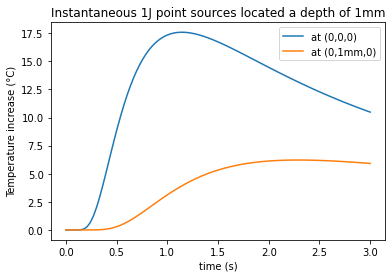

In [5]:
point = grheat.Point(0, 0, 0.001)
t = np.linspace(0,3,100)
tp = 0
T = point.instantaneous(0,0,0,t,tp)
plt.plot(t,T, label='at (0,0,0)')
T = point.instantaneous(0,1e-3,0,t,tp)
plt.plot(t,T, label='at (0,1mm,0)')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point sources located a depth of 1mm")
plt.show()

### Continuous flow across boundary

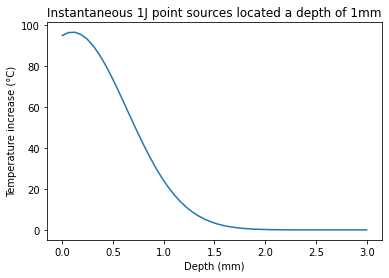

In [9]:
point = grheat.Point(0, 0, 0.0001)
t = 1
tp = 0
z = np.linspace(0,0.003,50)
T = point.instantaneous(0,0,z,t,tp)
plt.plot(z*1000,T, label='at (0,0,0)')
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point sources located a depth of 1mm")
plt.show()

### Showing adiabatic boundary condition

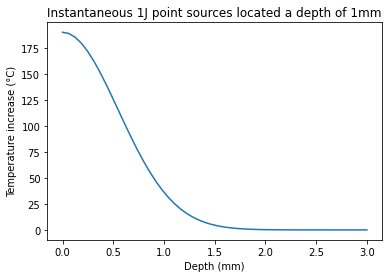

In [7]:
point = grheat.Point(0, 0, 0.0001, boundary='adiabatic')
t = 1
tp = 0
z = np.linspace(0,0.003,50)
T = point.instantaneous(0,0,z,t,tp)
plt.plot(z*1000,T, label='at (0,0,0)')
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point sources located a depth of 1mm")
plt.show()

### Showing zero boundary condition

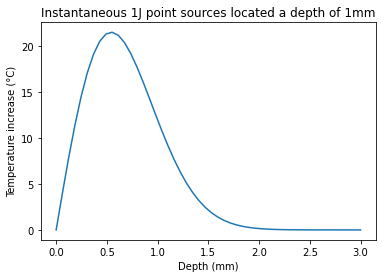

In [8]:
point = grheat.Point(0, 0, 0.0001, boundary='constant')
t = 1
tp = 0
z = np.linspace(0,0.003,50)
T = point.instantaneous(0,0,z,t,tp)
plt.plot(z*1000,T, label='at (0,0,0)')
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point sources located a depth of 1mm")
plt.show()

In [ ]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

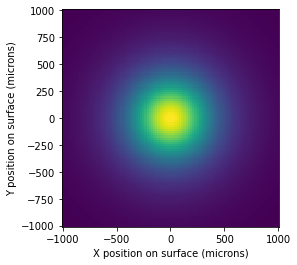

In [16]:
xp, yp, zp = 0, 0, 0.0001      # meters

point = grheat.Point(xp, yp, zp, boundary='adiabatic')
t_pulse = 1
t = 1.1
arr = np.linspace(-1,1,100) * 0.001
X, Y = np.meshgrid(arr, arr)
T = point.pulsed(X, Y, 0, t, t_pulse)
plt.pcolormesh(X*1e6, Y*1e6, T)
plt.xlabel("X position on surface (microns)")
plt.ylabel("Y position on surface (microns)")
plt.gca().set_aspect(1)
plt.show()

In [4]:
tp = 0
t = 1
for t_pulse in [0.0001, 0.001, 0.01, 0.1, 0.99]:
    T1 = point.instantaneous(0,0,0,t,0,0,1e-3,tp)
    T2 = point.pulsed(0,0,0,t,0,0,1e-3,t_pulse)
    print("%.4f  %.4f" %(t_pulse, T2/T1))

0.0001  1.0000
0.0010  0.9999
0.0100  0.9989
0.1000  0.9857
0.9900  0.4858
